<a href="https://colab.research.google.com/github/Hadavand-s-Minions/rsna-cervical-spine/blob/main/notebooks/Cervical_Spine_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries And Modules

These are the libraries we will need for EDA, preprocessing image data, splitting the data, computing accuracy and improving model performance

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from PIL import Image

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

# from sklearn import decomposition 
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.svm import LinearSVC 
# from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, ParameterGrid

### Mount Files from Google Drive to Read Image and Variable data for analysis

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# set the theme for EDA
sns.set_theme(palette='muted')

## EDA on Metadata For Test Set

The image data is stored in 2019 image directories where each directory contains a certain number of images from a given scan. For each of these directories, the train.csv is a file with metadata that describes whether all the images in that directory correspond to having a fracture based the scans of the cervical spine.

Specifically, for given row, we have the variables show in the table below and each of the variables is explained in the github repository under project_codebook. An example is: if row 1 has C1 =1 and C2 - C7 = 0, then there is a fracture in one vertebrae and therefore overall fracture for the patient. This applies to all the images in that directory in row 1

In [4]:
metadat = pd.read_csv('/content/gdrive/MyDrive/Tutorial_Session/train.csv')
metadat.head()

,slice_path,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
0,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,12,512,512
1,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,210,512,512
2,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,120,512,512
3,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,208,512,512
4,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,141,512,512


In [5]:
# get summary statistics for all the columns
metadat.describe(include='all')

,slice_path,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
count,711601,711601,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000
unique,711601,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.20756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.450982,0.067459,0.127209,0.035374,0.051190,0.079213,0.132415,0.185012,201.459901,512.283736,512.281326
std,NaN,NaN,0.497592,0.250816,0.333207,0.184723,0.220386,0.270071,0.338942,0.388308,143.653159,8.482687,8.481772
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,512.000000,512.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,512.000000,512.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,177.000000,512.000000,512.000000
75%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,281.000000,512.000000,512.000000


In [6]:
# drop columns we don't need
columns = ["slice_path", "width", "height", "slice_path"]
metadat = metadat.drop(columns, axis=1)
metadat.head()

            StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7  \
0  1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
1  1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
2  1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
3  1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   
4  1.2.826.0.1.3680043.17625                1   0   1   0   0   0   0   0   

   slice_id  
0        12  
1       210  
2       120  
3       208  
4       141  

In [7]:
# check for null values
metadat.isnull().sum()

StudyInstanceUID    0
patient_overall     0
C1                  0
C2                  0
C3                  0
C4                  0
C5                  0
C6                  0
C7                  0
slice_id            0
dtype: int64

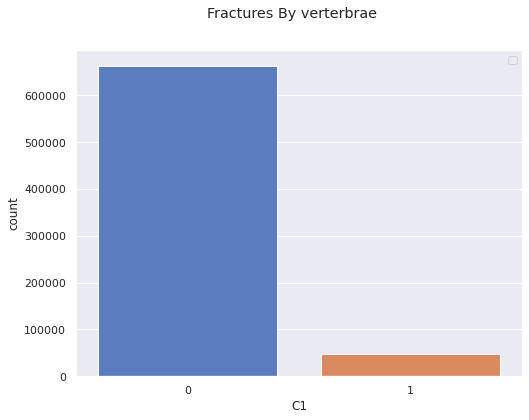

In [8]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C1", data=metadat, 
            ax=ax)
# sns.catplot(data=metadat, x="C1", kind="box")

ax.set_xlabel("C1")
ax.legend()

fig.suptitle("Fractures By verterbrae");

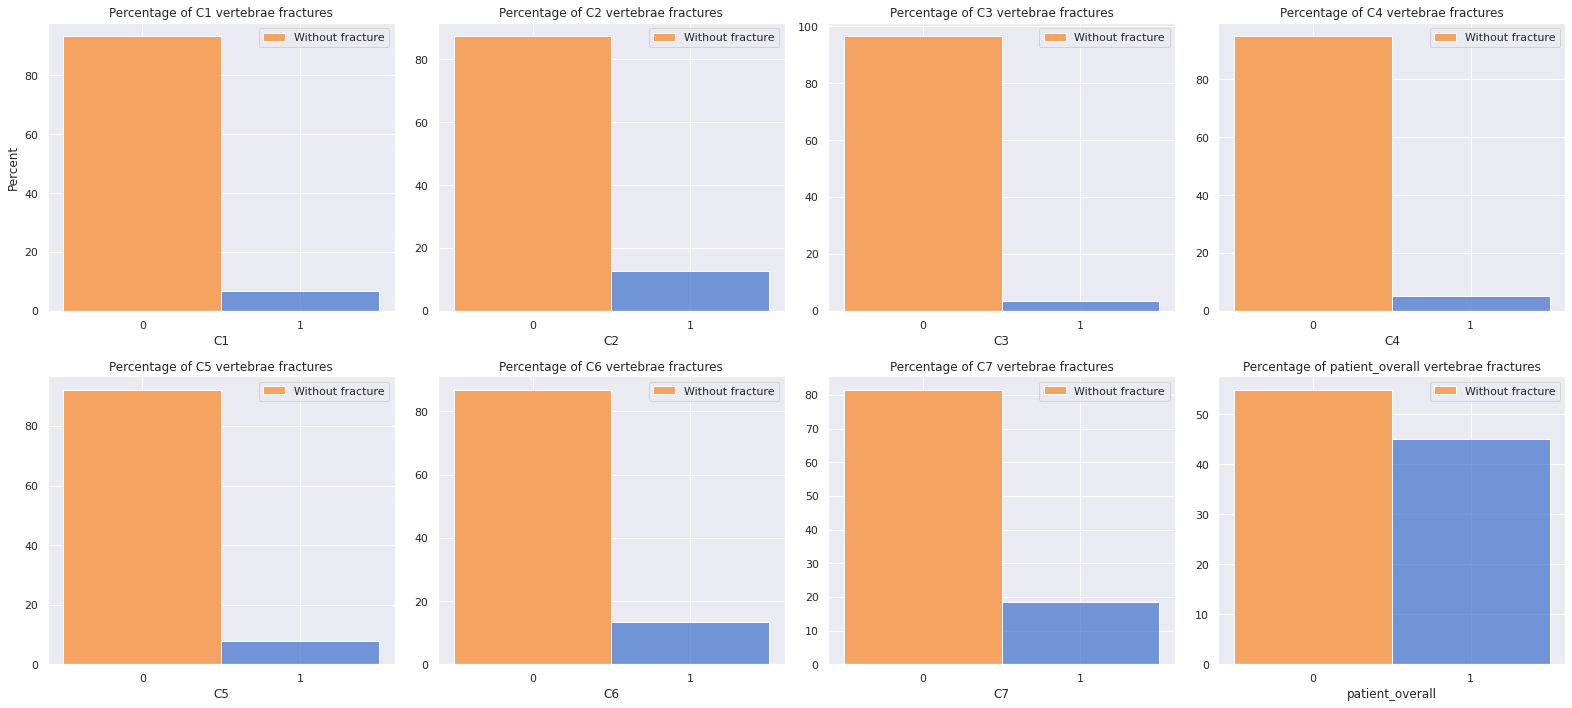

In [30]:
columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'patient_overall']
fig, axs = plt.subplots(2, 4, figsize=(22, 10))
#flatteen the axis
axs = axs.flatten()

for ax, column in zip(axs, columns):
    sns.histplot(metadat[column], discrete=True, ax=ax, stat='percent')
    ax.xaxis.set_major_locator(MultipleLocator(1))  # set ticks at each position
    ax.set_title(f"Percentage of {column} vertebrae fractures")
    ax.patches[0].set_facecolor('sandybrown')
    # ax.patches[1].set_facecolor('teal')
    ax.legend(["Without fracture", "With Fracture"])
    if ax != axs[0]:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

From the visualizations above, we can see that C1, C3, C4, C5 vertebrae have the lowest proportion of of fractures. On the other hand, we can see that C2, C6, and C7 have comparatively higher proportion of fractures. C7 has the highest proportion of fractures compared to other vertebrae because its the vertebrae that connects the neck with the upper-back and is highly associated with back injuries. Back injuries are much more common than neck injuries which explains this difference. C3 and C4 have particularly low fractures because of the curvature of the neck which means that they are protected by the other vertebrae in the event of a neck injury. 

The patient overall corresponds to whether or not a patient has a fracture in any one of their vertebrae. Therefore, as long as a patient has a fracture in one vertebrae, then the overall conclusion is that they have a fracture. This is why the patient overall column has significantly higher fractures than the individual vertebrae. 

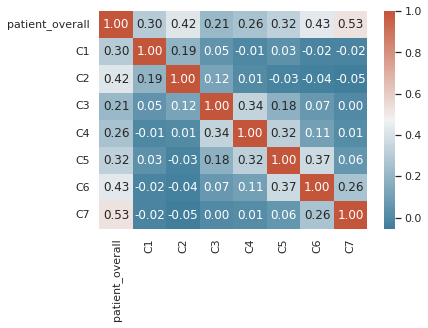

In [10]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(metadat.drop("slice_id", axis=1).corr(),annot=True, fmt = ".2f", cmap=cmap, linecolor='w')
plt.show()


We can see that C7 us highly correlated with the patient overall. This makes sense because it is the vertebra with the highest number of fractures from patient data. That means that if a patient has a fracture on C7 then they have a fracture overall. However, this is not new information. What is interesting is the correlation between C3 and C4, C4 and C5 and C5 and C6. There is a moderate level of correlation between these vertebra. This makes sense given how close they are to each other. If there is an injury in C3 there is likely to be an injury in C4. Interestingly, this moderate level of correlation is not observed with C1 and C2, C2 and C3 and C6 and C7 despite the vertebrae being close together. Again, this may be because of the curvature of the neck such that the middle vertebrae are harder to get fractured but when they do, they get fractured together. 

## Image Visualization
C1 - C5

In [11]:
def rand_verteb(path, number, random_state):
    '''Function to load the images and randomly select a given size of images
        path: which folder the images are in
        number: how many images to to select
        random_state: seed to make the results reproducible
    '''
    #set a seed
    np.random.seed(random_state)
    
    #read the files from the path and randomly select a given number
    files = os.scandir(path)
    files = [i.name for i in files]
    return np.random.choice(files, size=number, replace=False)

files = rand_verteb("/content/gdrive/MyDrive/Tutorial_Session/hadavands_minions/train_images/1.2.826.0.1.3680043.14", 400, 123) 

In [12]:
#code adopted from LBA assignment
def img_to_arr(imgs, path):
    #list to store images
    flattened = []
    
    # for each image combine the name with path 
    for img in imgs:
        # open it as a read file in binary mode
        with open(path+img, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                #cover = resizeimage.resize_cover(image, [512, 512])
                cover = image.resize((360,360))
                flattened.append((np.array(cover).flatten(), 0))
                
    # Flatten it once more
    flattened = np.asarray(flattened)
    
    return flattened

In [13]:
vertebs = img_to_arr(files, '/content/gdrive/MyDrive/Tutorial_Session/hadavands_minions/train_images/1.2.826.0.1.3680043.14/')

<ipython-input-12-1a89fcfb8a45>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  flattened = np.asarray(flattened)


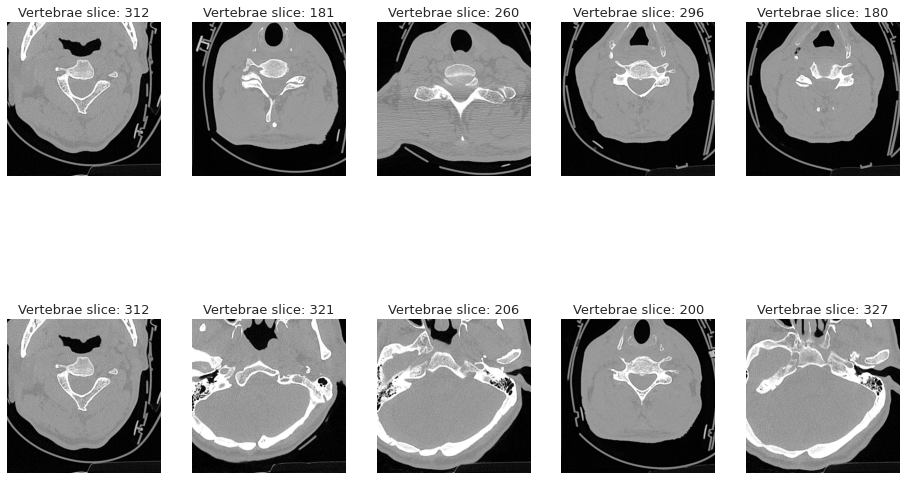

In [14]:
#display some of the images
# initializing the subplots
fig, axs = plt.subplots(2, 5, figsize=(16, 10))

#flatteen the axis
axs = axs.flatten()

# look at random selected vertebs
range_j = np.random.randint(0, len(vertebs), 10)
for p, ax in zip(range_j, axs):
    
    #resize the matrix to the same shape as the images and rotate
    ax.imshow(Image.fromarray(vertebs[p,0].reshape(360,360)), cmap='Greys_r')
    ax.set_title(f'Vertebrae slice: {p+1}', size=13)
    ax.axis('off')

The above shows different top view slices of the xrays

## EDA on Image Slices

In [15]:
base_folder: str = "/content/gdrive/MyDrive/Tutorial_Session/hadavands_minions"
segmentations_folder: str = base_folder + "/segmentations_npy/"

training_folder: str = base_folder + "/train_images/"


segmentations_df = pd.DataFrame({
    "segmentations": os.listdir(segmentations_folder)
})

segmentations_df["StudyInstanceUID"] = segmentations_df[
    "segmentations"
  ].str.strip(".npy")
segmentations_df["segmentations"] = segmentations_folder + segmentations_df[
    "segmentations"
  ]


segmentations_df = segmentations_df.set_index("StudyInstanceUID")

training_df = pd.DataFrame({
    "training": os.listdir(training_folder)
})

training_df["StudyInstanceUID"] = training_df["training"]

training_df["training"] = training_folder + training_df["training"]


training_df = training_df.set_index("StudyInstanceUID")

train_df = pd.read_csv(base_folder+"/train.csv")
train_df = train_df.set_index("StudyInstanceUID")

df = pd.concat([segmentations_df, training_df, train_df], axis=1)

df

,segmentations,training,patient_overall,C1,C2,C3,C4,C5,C6,C7
StudyInstanceUID,,,,,,,,,,
1.2.826.0.1.3680043.10633,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.10921,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.11827,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.11988,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1.2.826.0.1.3680043.12281,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.23422,NaN,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.30831,NaN,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.501,NaN,/content/gdrive/MyDrive/Tutorial_Session/hadav...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# !pip install matplotlib --upgrade

(0.0, 1300.0)

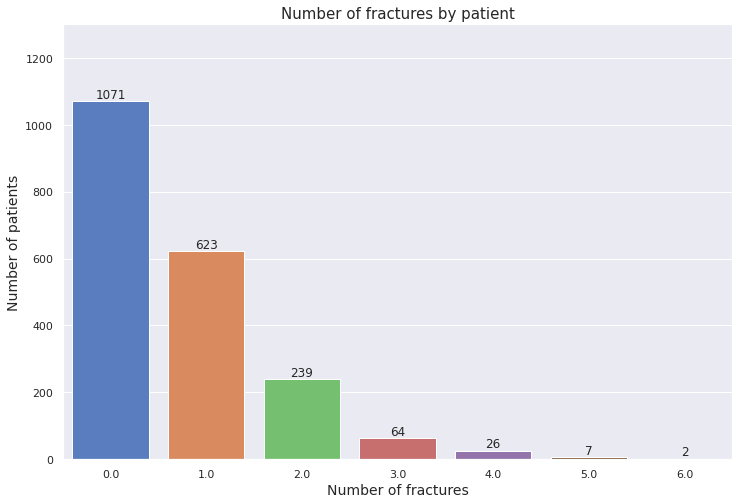

In [51]:
# distribution of fractures by patients
ig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1))
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Number of fractures by patient', fontsize=15)
ax.set_xlabel('Number of fractures', fontsize=14)
ax.set_ylabel('Number of patients', fontsize=14)
plt.ylim([0,1300])

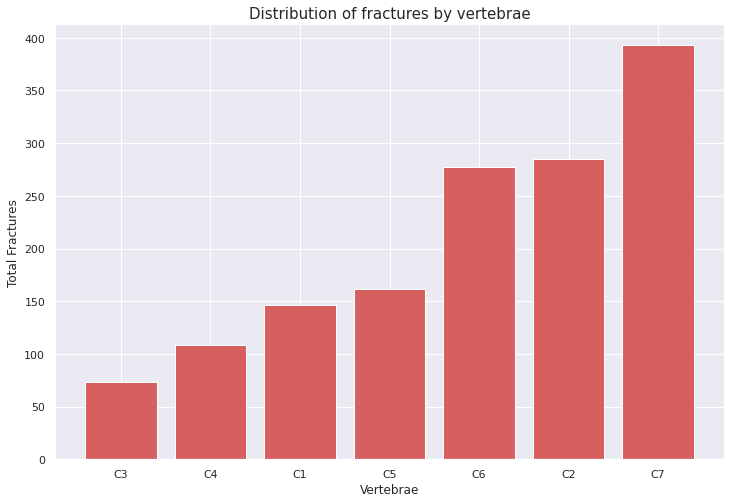

In [40]:
# Fracture total distribution for different vertebraes
fractures = df.loc[df["patient_overall"] == 1]
C1 = len(fractures.loc[fractures["C1"] == 1])
C2 = len(fractures.loc[fractures["C2"] == 1])
C3 = len(fractures.loc[fractures["C3"] == 1])
C4 = len(fractures.loc[fractures["C4"] == 1])
C5 = len(fractures.loc[fractures["C5"] == 1])
C6 = len(fractures.loc[fractures["C6"] == 1])
C7 = len(fractures.loc[fractures["C7"] == 1])
fractures_df = pd.DataFrame(dict(
    labels=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
    values=[C1, C2, C3, C4, C5, C6, C7]
))
fractures_df = fractures_df.sort_values('values')

fig, ax = plt.subplots(figsize=(12,8))
ax.bar('labels', 'values', data=fractures_df, color = 'r')
ax.set_title("Distribution of fractures by vertebrae", fontsize=15)
ax.set_xlabel("Vertebrae")
ax.set_ylabel("Total Fractures")
plt.show()

In [41]:
# Get the number of slices in each study
df["slices"] = df.training.apply(
    lambda path: len(os.listdir(path)))
df.head(3)

,segmentations,training,patient_overall,C1,C2,C3,C4,C5,C6,C7,slices
StudyInstanceUID,,,,,,,,,,,
1.2.826.0.1.3680043.10633,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,429
1.2.826.0.1.3680043.10921,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339
1.2.826.0.1.3680043.11827,/content/gdrive/MyDrive/Tutorial_Session/hadav...,/content/gdrive/MyDrive/Tutorial_Session/hadav...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,208


Text(0.5, 0, 'Number of Slices')

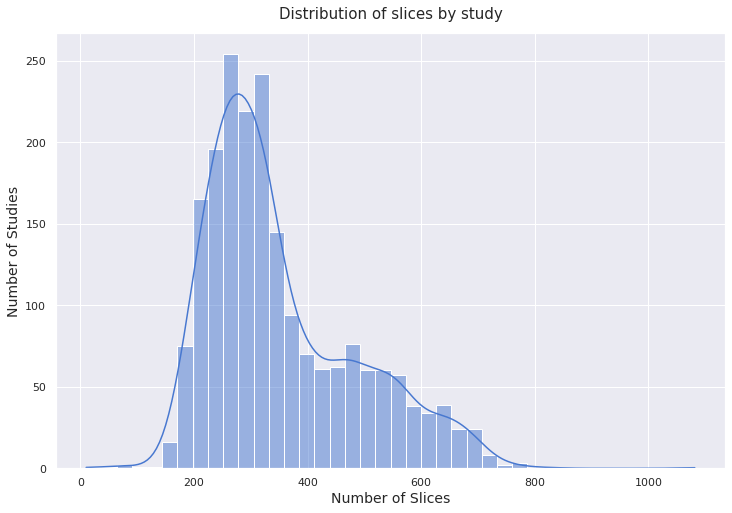

In [50]:
# Distribution of slices counts
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='slices', kde=True, bins=40, ax=ax)
ax.set_title("Distribution of slices by study", size=15, y=1.02)
ax.set_ylabel("Number of Studies", size=14)
ax.set_xlabel("Number of Slices", size = 14)

In [47]:
df['slices'].describe()

count    2032.000000
mean      352.296260
std       132.377092
min        10.000000
25%       257.000000
50%       314.000000
75%       429.000000
max      1082.000000
Name: slices, dtype: float64